<center>
<img src="images/ods_stickers.jpg" />
    
# Introducción al Machine Learning 2020

Basado en material de  [Yury Kashnitsky](https://yorko.github.io). Traducido y editado al español por [Ana Georgina Flesia](https://www.linkedin.com/in/georginaflesia/). Este material esta sujeto a los términos y condiciones de la licencia  [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Se permite el uso irrestricto para todo propósito no comercial.

# <center>  Visual data analysis
## Ejercicio02 Analizando pasajeros del "Titanic" 

**Complete el código que falta ("# You code here"). No es necesario seleccionar respuestas en un formulario web.**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

**Leer datos**

In [3]:
train_df = pd.read_csv("../data/titanic_train.csv", 
                       index_col='PassengerId') 

In [4]:
train_df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [5]:
train_df.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Milling, Mr. Jacob Christian",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


**Vamos a sacar la variable`Cabin`, y todas las filas con NaN's y missing values.**

In [7]:
train_df = train_df.drop('Cabin', axis=1).dropna()

In [8]:
train_df.shape

(712, 10)

**1. Cree una figura para visualizar todos los diagramas de dispersión para cada par de características `Age`, `Fare`, `SibSp`, `Parch` y `Survived`. ( `scatter_matrix ` de Pandas or `pairplot` de Seaborn)**

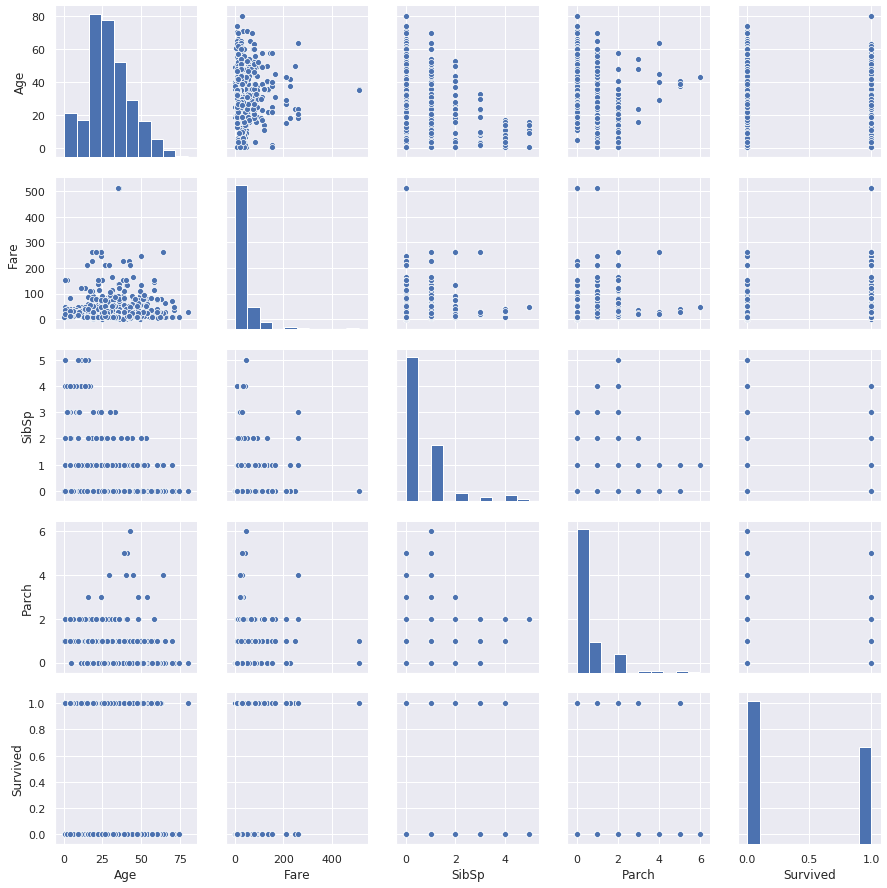

In [10]:
# You code here
sns.pairplot(data = train_df[['Age','Fare','SibSp','Parch','Survived']])

**2. ¿Cómo depende el precio del boleto (`Fare`) de `Pclass`? Construya un diagrama de caja (boxplot).**

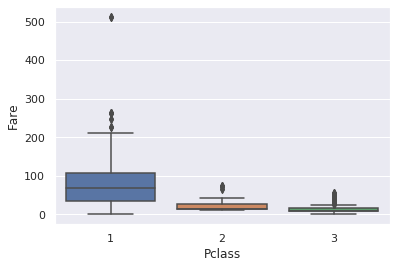

In [12]:
sns.boxplot(x='Pclass',y='Fare',data=train_df)

**3. Construya el mismo gráfico pero restringiendo los valores de `Fare` para que sean menores que el cuantil 95%  del vector inicial (para descartar valores atípicos que hacen que el gráfico sea menos claro).**

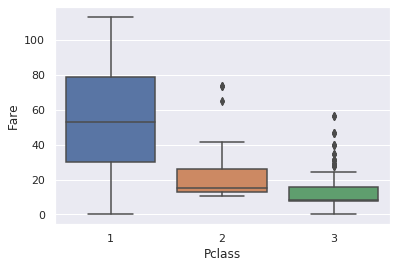

In [15]:
quantile95 = train_df['Fare'].quantile(.95)
quantile95_df = train_df[train_df['Fare'] < quantile95]
sns.boxplot(x='Pclass',y='Fare',data=quantile95_df)

**4. ¿Cómo depende el porcentaje de pasajeros sobrevivientes del género de los pasajeros? Representarlo con `Seaborn.countplot` usando el argumento `hue`.**

Parece que las mujeres sobrevivieron bastante mas que los hombres. Más aun teniendo en cuenta que había mas hombres

In [37]:
train_df['Sex'].value_counts(normalize=True)

male      0.636236
female    0.363764
Name: Sex, dtype: float64

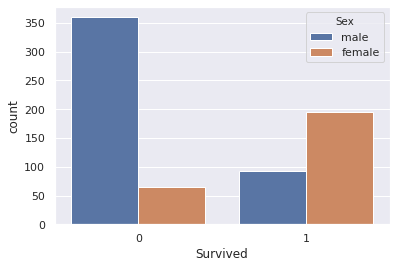

In [18]:
sns.countplot(x='Survived',hue='Sex',data=train_df)

**5. ¿Cómo difiere la distribución de los precios de las entradas para los que sobrevivieron y los que no? Representarlo con `Seaborn.boxplot`**

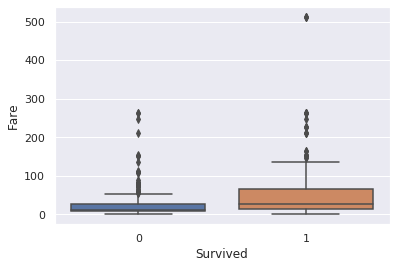

In [19]:
sns.boxplot(x='Survived',y='Fare',data=train_df)

**6. ¿Cómo depende la supervivencia de la edad de los pasajeros? Verifique (gráficamente) una suposición de que los jóvenes (<30 años) sobrevivieron con mayor frecuencia que las personas mayores (> 55 años).**

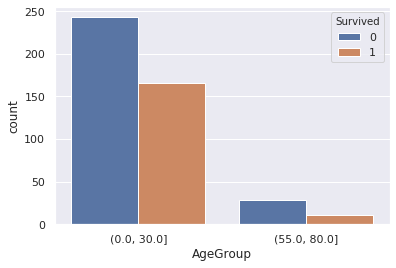

In [36]:
bins = pd.IntervalIndex.from_tuples([(0, 30), (55, train_df.Age.max())])
train_df['AgeGroup'] = pd.cut(train_df.Age, bins= bins)

sns.countplot(x='AgeGroup',hue='Survived',data=train_df)